In [4]:
library(igraph)
library(xts)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [337]:
file_lists = list.files("/Users/Yuanshao/workspace/ECE232/P5/finance_data/data")

In [338]:
dict_path = "/Users/Yuanshao/workspace/ECE232/P5/finance_data/data"
ts_list = list()
for(file in file_lists){
    stock = read.csv(paste(dict_path, file, sep ='/'))
    if(file == 'BF.B.csv' || file == 'BRK.B.csv')
        ts_list[[file]] = xts(stock[,-1], order.by = as.Date(stock$Date, format = "%m/%d/%y"))
    else
        ts_list[[file]] = (xts(stock[,-1], order.by = as.Date(stock$Date)))
}

In [339]:
len = length(file_lists)
corr_matrix = matrix(0, nrow = len, ncol = len)

In [340]:
corr_coef = function(ts1, ts2){
    r1 = (log(ts1$Close) - log(lag(ts1$Close)))[-1]
    r2 = (log(ts2$Close) - log(lag(ts2$Close)))[-1]
    numerator = mean(r1 * r2) - mean(r1) * mean(r2)
    denom = sqrt((mean(r1^2) - mean(r1) ^ 2) * (mean(r2^2) - mean(r2) ^ 2))
    return(numerator / denom)
}  

In [341]:
i_list = 1:len
df.data = data.frame(A = character(), B = character(), C = numeric(), stringsAsFactors=FALSE)
colnames(df.data) = c("node1", "node2", "weights")

In [342]:
enum_list = data.frame(x = i_list, y = file_lists)
W = numeric()
edge_count = 0
for(i in i_list){
    for(j in i_list){
        if(i > j){
            edge_count = edge_count + 1
            file1 = enum_list[2][i,]
            file2 = enum_list[2][j,]
            ts1 = ts_list[[file1]]
            ts2 = ts_list[[file2]]
            corr = corr_coef(ts1, ts2)
            w = sqrt(2 * (1 - corr))
            W = c(W, w)
            s1 = toString(file1)
            s2 = toString(file2)
            df.data[edge_count, 1] =substr(s1,1,nchar(s1) - 4)
            df.data[edge_count, 2] =substr(s2,1,nchar(s2) - 4)
            df.data[edge_count, 3] = w   
        }
    }
}

In [212]:
file1 = enum_list[2][1,]
toString(file1)

[1] "A.csv"

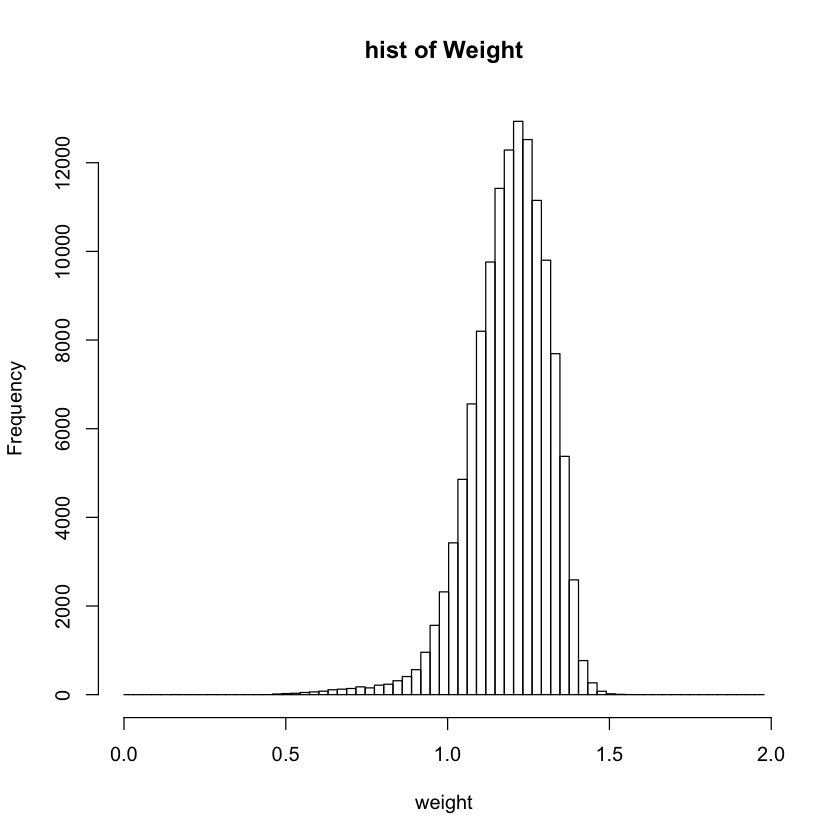

In [344]:
hist(W, main = "hist of Weight", xlab ='weight', breaks = seq(from = round(min(W)), to = round(max(W)), by = (max(W) - min(W)) / 50))

In [345]:
g1 = graph.data.frame(df.data, directed = FALSE)

In [346]:
nodes = V(g1)$name

In [348]:
sector = read.csv("/Users/Yuanshao/workspace/ECE232/P5/finance_data/Name_sector.csv", stringsAsFactors=FALSE)

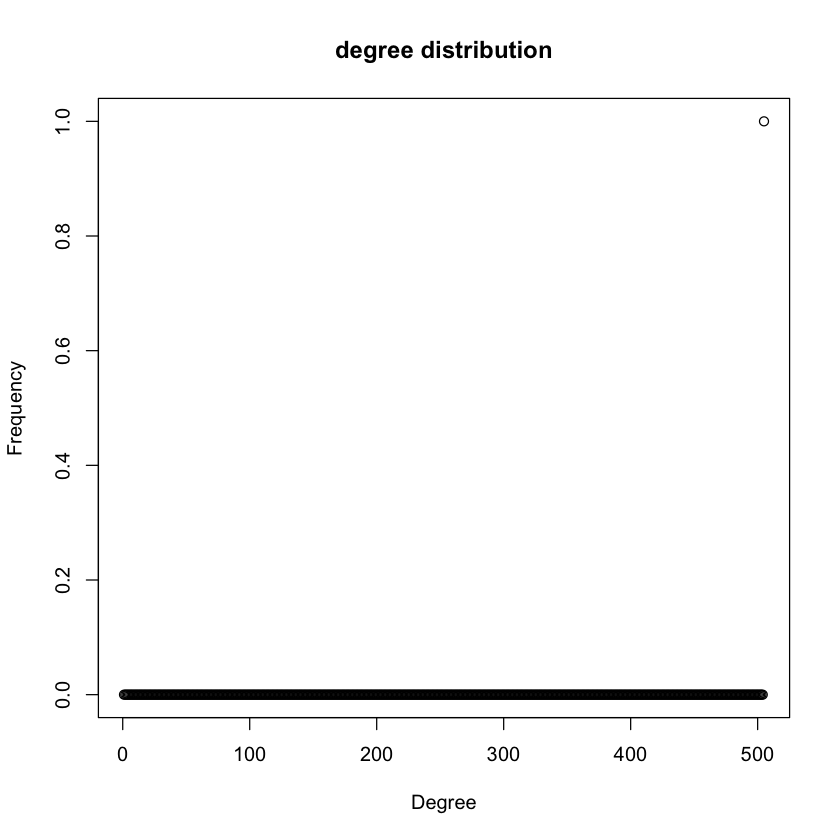

In [349]:
plot(degree.distribution(g1),main="degree distribution",xlab="Degree",ylab="Frequency")

In [350]:
sectors = sector$Sector
symbols = sector$Symbol
sector_set = unique(sectors)
colors = rep(0, len)
sizes = rep(3, len)

In [360]:
sector_set[1]

[1] "Health Care"

In [364]:
map2<-new.env(hash=T, parent=emptyenv())
for(i in 1:length(sector_set)){
    map2[[sector_set[i]]] = i
}

In [362]:
name2sec = unlist(lapply(nodes, function(x){map1[[x]]}))

In [361]:
map1<-new.env(hash=T, parent=emptyenv())
for(i in 1:len){
    map1[[symbols[i]]] = sectors[i] 
}

In [370]:
sec2color = unlist(lapply(name2sec, function(x){map2[[x]]}))

In [371]:
sec2color

[1]  2  3  4  1  1  1  4  4  4  5  4  4  4  6  6  6  1  7  1  7  8  7  7  4  9
 [26]  2  7  2  1  4  4  2  7  1  7  8  3  3  1  7 10 10  9  4  8  2  4  8  4  9
 [51]  6  7  2  3  2  7  1  3  7  3  1  1  7  5 10  1  7  7  9  1  7  1  3  8  7
 [76]  4  5  1  2  7  8  7  3  8  3  1  1  9  7  5 10  2  3  1  7  5  5  7  3  7
[101]  3  2  6  1  6  7 10  3  2  1 10  5  5  5  4  4  4  2  2 11  4  4  5 10 10
[126]  6  2  9  2  7  3  1  3  1  3  3  3  3  3  8  3  2  9  5  3  6  6  1 10  4
[151]  4  4  9  6  2  6  5  9  2 10  8  8 10  6  1  8  7  2  6  1  1  6  2  3  8
[176]  3  2  4  2  9  2  6  4  4  4  7  3  4  2  2  9  3  3  8 10  2  2  2  8  1
[201]  5  4  3  4  4  3  4  3  3  7  3  2 10  3  7  3  1  8  8  3 10  7  3  1  2
[226] 10  4  4  7  5  4  1  8  5  1  4  7  1  9  1  1  4  4  9  3  2  8  1  4  2
[251]  7  2  2  2  1  4  7  3  5  7  5  8  4  5 10  3  5  3  5  3  2  7  3  3  3
[276]  1  3  2  1  2  7  6  3  4  7  2 11  9  3  4  8  8  3  2  3  3  4  1  7  5
[301]  1  7  3  5  5  9  7  2  1  5  5  9  9 10  1 10  7  4  4  7  1  4 10  1  7
[326] 10  7  6  9  4 10  6  3  2  2 10  6  2  4  7  9  4  3  3  3  8 10  3  4  3
[351] 10  4  7  2  6  3  1  6  5  1  7  5  7  2  3  1  8  5  7  2  6  9  6  1  7
[376]  8 10  3  2  9 10  4  4  4  2  5  3  8  1  7  2  4 10  7  3  2  2  3 10  2
[401]  2  3  6  7  9  9  3  5 10  8  3  3  4  6  8  7  3  2  6  7  7  4  5  3  4
[426]  7  1  4  5 11  5  4  2  4  3  3  3  3  7  1  3  7  7  3  5 10  4  3  4  2
[451]  3  3  2  8  1  3  1  7  2  2  2  7  2  4  1  3  3 10  9  8  2  4  1  8 11
[476]  1  5  4  6  7  5  3  7  2 10  5  9  4  8  3  3 10  6  7  4 10  1  4  2  4
[501]  3  1  7  1  1

In [372]:
mst = mst(g1, weights = df.data$weights)

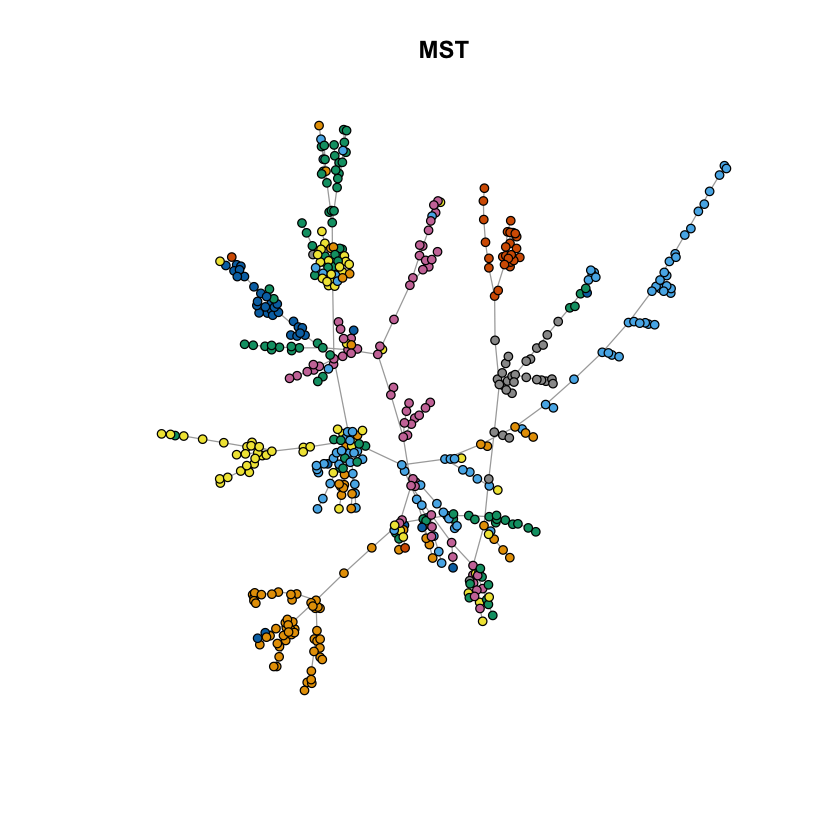

In [375]:
plot(mst, vertex.color = sec2color, vertex.size = sizes, vertex.label = NA, main="MST")

In [379]:
#p4
p_sum = 0
V(mst)$sector = name2sec
V(mst)$color = sec2color
for(vertex in V(mst)){
    neighbor = neighbors(mst, vertex)
    sec = V(mst)[vertex]$color
    num = 0
    for(k in neighbor){
        if(sec == V(mst)[k]$color)
            num = num + 1
    }
    p_sum = p_sum + (num / length(neighbor))
}
alpha1 = p_sum / len

In [381]:
alpha1

[1] 0.8217551

In [386]:
probability = unlist(table(V(mst)$color) / len)

In [398]:
V(mst)$color2 = sample(1:length(probability), len, replace=TRUE, prob = probability)

In [399]:
p_sum = 0
for(vertex in V(mst)){
    neighbor = neighbors(mst, vertex)
    sec = V(mst)[vertex]$color2
    num = 0
    for(k in neighbor){
        if(sec == V(mst)[k]$color2)
            num = num + 1
    }
    p_sum = p_sum + (num / length(neighbor))
}
alpha2 = p_sum / len

In [400]:
alpha2

[1] 0.1213511

In [401]:
#p5
weekly_ts_list = list() 
for(file in file_lists){
    weekly_ts_list[[file]] = ts_list[[file]][weekdays(index(ts_list[[file]])) == 'Monday']
}

In [405]:
i_list = 1:len
df.data = data.frame(A = character(), B = character(), C = numeric(), stringsAsFactors=FALSE)
colnames(df.data) = c("node1", "node2", "weights")

In [406]:
enum_list = data.frame(x = i_list, y = file_lists)
W = numeric()
edge_count = 0
for(i in i_list){
    for(j in i_list){
        if(i > j){
            edge_count = edge_count + 1
            file1 = enum_list[2][i,]
            file2 = enum_list[2][j,]
            ts1 = weekly_ts_list[[file1]]
            ts2 = weekly_ts_list[[file2]]
            corr = corr_coef(ts1, ts2)
            w = sqrt(2 * (1 - corr))
            W = c(W, w)
            s1 = toString(file1)
            s2 = toString(file2)
            df.data[edge_count, 1] =substr(s1,1,nchar(s1) - 4)
            df.data[edge_count, 2] =substr(s2,1,nchar(s2) - 4)
            df.data[edge_count, 3] = w   
        }
    }
}

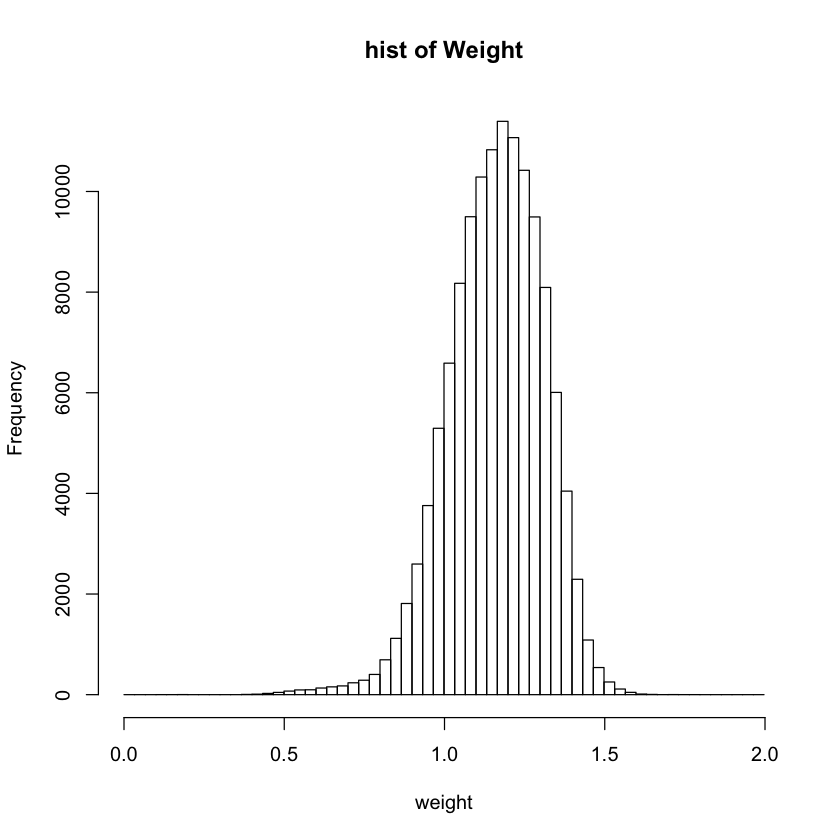

In [410]:
hist(W, main = "hist of Weight", xlab ='weight', breaks = seq(from = round(min(W)), to = round(max(W)), by = (max(W) - min(W)) / 50))

In [411]:
g2 = graph.data.frame(df.data, directed = FALSE)

In [412]:
sectors = sector$Sector
symbols = sector$Symbol
nodes = V(g2)$name
sector_set = unique(sectors)
colors = rep(0, len)
sizes = rep(3, len)
map1<-new.env(hash=T, parent=emptyenv())
for(i in 1:len){
    map1[[symbols[i]]] = sectors[i] 
}
name2sec = unlist(lapply(nodes, function(x){map1[[x]]}))
map2<-new.env(hash=T, parent=emptyenv())
for(i in 1:length(sector_set)){
    map2[[sector_set[i]]] = i
}
sec2color = unlist(lapply(name2sec, function(x){map2[[x]]}))

In [413]:
mst = mst(g2, weights = df.data$weights)

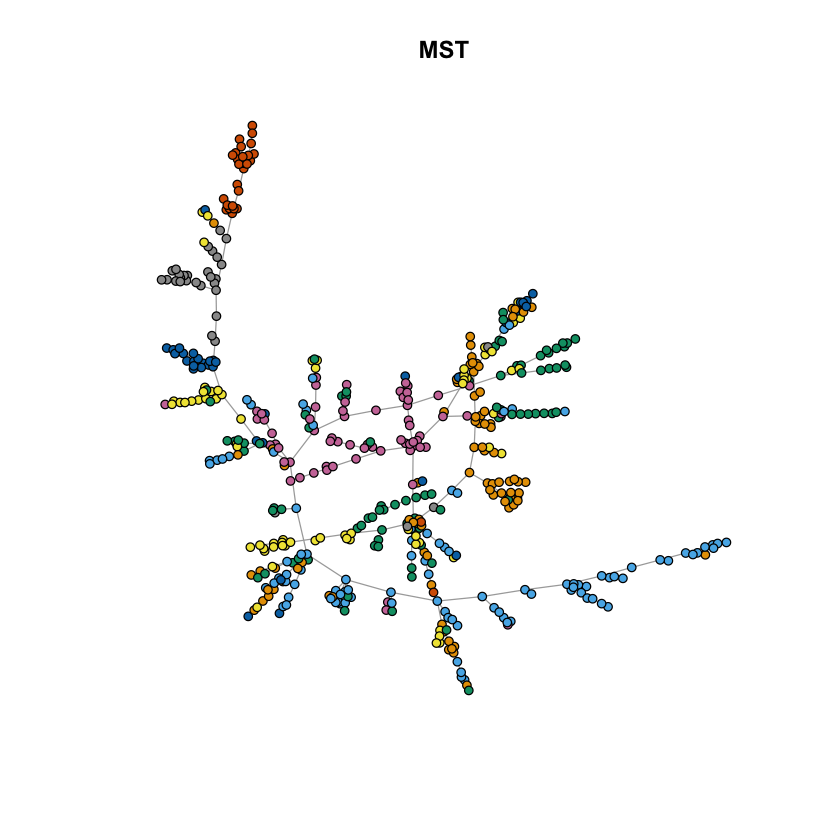

In [414]:
plot(mst, vertex.color = sec2color, vertex.size = sizes, vertex.label = NA, main="MST")